In [46]:
import io
import os
import math
import requests
import datetime
import warnings
import winsound
import itertools
import matplotlib
import statistics 
import numpy as np
import pandas as pd
from numpy import zeros
from pathlib import Path
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from colorama import Fore, Back, Style 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from bokeh.plotting import figure, show, output_file
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
print('TimeFrames : H1, H4, D1, W1, MN')
timeframe01=input('Enter The TimeFrame :',)
timeframe1=str(timeframe01).upper()
direction1=str("C:\\Users\\maryam\\AppData\\Roaming\\MetaQuotes\\Terminal\\287469DEA9630EA94D0715D755974F1B\\MQL4\\Files\\TF-"+timeframe1)
currencies0 = os.listdir(direction1)    
currencies = list(filter(lambda f: f.endswith('.csv'), currencies0))
numcurrencies=len(currencies)
print(Fore.BLACK +'---------------------------List of All Currencies----------------------------')
print(Fore.BLACK +'The Number of Total Currencies is :'+' ' ,numcurrencies)
currencies

TimeFrames : H1, H4, D1, W1, MN
Enter The TimeFrame :h1
---------------------------List of All Currencies----------------------------
The Number of Total Currencies is :  9


['AUDJPY,H1.csv',
 'BTCUSD,H1.csv',
 'ETHUSD,H1.csv',
 'EURUSD,H1.csv',
 'GBPUSD,H1.csv',
 'NZDUSD,H1.csv',
 'USDCAD,H1.csv',
 'XAUUSD,H1.csv',
 'XAUUSD60.csv']

In [47]:
#DIRECTION AND SELECT CURRENCY-------------------------------------------------------------------------------------------
namestart0=input('Whats The Name of Currency ? ').upper()
namestart1=namestart0+(',')+timeframe1+('.csv')
def find_files(filename, search_path):
    result = []

    for root, dir, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
    return result
filepath1=find_files(namestart1,direction1)
print('------------------------The file'+' '+namestart1+' '+'is in this directory---------------------')
print(filepath1[0])

Whats The Name of Currency ? EURUSD
------------------------The file EURUSD,H1.csv is in this directory---------------------
C:\Users\maryam\AppData\Roaming\MetaQuotes\Terminal\287469DEA9630EA94D0715D755974F1B\MQL4\Files\TF-H1\EURUSD,H1.csv


In [48]:
#DEFINE START-------------------------------------------------------------------------------------------
start0test=input('Enter the start date for choose the Currency : ')
starttest=int(start0test)
#DEFINE PREDICTION--------------------------------------------------------------------------------------
ahead0=input('Enter the candles ahead for prediction in Test : ')
ahead=int(ahead0)
#-------------------------------------------------------------------------------------------------------
indice0CloseE=pd.read_csv(filepath1[0],usecols=[5])
daynumberE=indice0CloseE.shape[0]
todayE=datetime.datetime(datetime.datetime.now().year,
                         datetime.datetime.now().month,
                         datetime.datetime.now().day)
#---------------------------------------------------------------------------------------------------
#REGROUP AND SET THE DATA---------------------------------------------------------------------------
dataset=pd.DataFrame(data=indice0CloseE.values[starttest:daynumberE,:],columns=['Close'])

Enter the start date for choose the Currency : 1000
Enter the candles ahead for prediction in Test : 10


In [49]:
dataset1=dataset.values.astype('float32')
train_size=int(len(dataset1)*0.67)
test_size=len(dataset1)-train_size
train,test=dataset1[0:train_size,:],dataset1[train_size:len(dataset),:]
print(len(train),len(test))

702 346


In [50]:
def create_dataset(dataset1,look_back=1):
    datax,datay=[],[]
    for i in range (len(dataset1)-look_back-1):
        a=dataset1[i:(i+look_back),0]
        datax.append(a)
        datay.append(dataset1[i+look_back,0])
    return np.array(datax),np.array(datay)
create_dataset(dataset1,look_back=1)

(array([[1.16154],
        [1.16153],
        [1.16108],
        ...,
        [1.13078],
        [1.12959],
        [1.13095]], dtype=float32),
 array([1.16153, 1.16108, 1.16023, ..., 1.12959, 1.13095, 1.12924],
       dtype=float32))

In [55]:
look_back=1
trainx,trainy=create_dataset(train,look_back)
testx,testy=create_dataset(test,look_back)

trainx=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx,(testx.shape[0],1,testx.shape[1]))

model=Sequential()
model.add(LSTM(4,input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainx,trainy,epochs=500,batch_size=1,verbose=1)
#ALARM FOR END THE SIMULATION-----------------------------------------------------------------------------
for beebnumber in range(3):
    frequency = 2000  
    duration = 1000
    winsound.Beep(frequency, duration)

Epoch 1/500
700/700 [==============================] - 5s 2ms/step - loss: 0.3035
Epoch 2/500
700/700 [==============================] - 2s 3ms/step - loss: 1.4115e-05
Epoch 3/500
700/700 [==============================] - 2s 3ms/step - loss: 1.1239e-05
Epoch 4/500
700/700 [==============================] - 2s 2ms/step - loss: 1.1285e-05
Epoch 5/500
700/700 [==============================] - 2s 3ms/step - loss: 1.1434e-05
Epoch 6/500
700/700 [==============================] - 2s 2ms/step - loss: 1.1620e-05
Epoch 7/500
700/700 [==============================] - 2s 2ms/step - loss: 1.1597e-05
Epoch 8/500
700/700 [==============================] - 2s 2ms/step - loss: 1.1906e-05
Epoch 9/500
700/700 [==============================] - 1s 2ms/step - loss: 1.2326e-05
Epoch 10/500
700/700 [==============================] - 2s 2ms/step - loss: 1.3012e-05
Epoch 11/500
700/700 [==============================] - 2s 2ms/step - loss: 1.3061e-05
Epoch 12/500
700/700 [==============================] - 

700/700 [==============================] - 1s 2ms/step - loss: 2.6928e-06
Epoch 95/500
700/700 [==============================] - 1s 2ms/step - loss: 2.6649e-06
Epoch 96/500
700/700 [==============================] - 1s 2ms/step - loss: 2.6687e-06
Epoch 97/500
700/700 [==============================] - 1s 2ms/step - loss: 2.4159e-06
Epoch 98/500
700/700 [==============================] - 1s 2ms/step - loss: 2.8368e-06
Epoch 99/500
700/700 [==============================] - 1s 2ms/step - loss: 2.2944e-06
Epoch 100/500
700/700 [==============================] - 1s 2ms/step - loss: 2.7550e-06
Epoch 101/500
700/700 [==============================] - 1s 2ms/step - loss: 2.2493e-06
Epoch 102/500
700/700 [==============================] - 1s 2ms/step - loss: 2.8854e-06
Epoch 103/500
700/700 [==============================] - 1s 2ms/step - loss: 2.4192e-06
Epoch 104/500
700/700 [==============================] - 1s 2ms/step - loss: 2.6476e-06
Epoch 105/500
700/700 [============================

700/700 [==============================] - 1s 2ms/step - loss: 2.1857e-06
Epoch 188/500
700/700 [==============================] - 1s 2ms/step - loss: 2.0989e-06
Epoch 189/500
700/700 [==============================] - 1s 2ms/step - loss: 2.1535e-06
Epoch 190/500
700/700 [==============================] - 1s 2ms/step - loss: 2.2643e-06
Epoch 191/500
700/700 [==============================] - 1s 2ms/step - loss: 1.8919e-06
Epoch 192/500
700/700 [==============================] - 1s 2ms/step - loss: 2.2027e-06
Epoch 193/500
700/700 [==============================] - 2s 2ms/step - loss: 1.9059e-06
Epoch 194/500
700/700 [==============================] - 1s 2ms/step - loss: 2.1077e-06
Epoch 195/500
700/700 [==============================] - 1s 2ms/step - loss: 1.9574e-06
Epoch 196/500
700/700 [==============================] - 1s 2ms/step - loss: 2.0551e-06
Epoch 197/500
700/700 [==============================] - 1s 2ms/step - loss: 2.5139e-06
Epoch 198/500
700/700 [=======================

700/700 [==============================] - 2s 2ms/step - loss: 2.3085e-06
Epoch 281/500
700/700 [==============================] - 1s 2ms/step - loss: 1.6866e-06
Epoch 282/500
700/700 [==============================] - 1s 2ms/step - loss: 1.9235e-06
Epoch 283/500
700/700 [==============================] - 1s 2ms/step - loss: 1.8141e-06
Epoch 284/500
700/700 [==============================] - 1s 2ms/step - loss: 2.2925e-06
Epoch 285/500
700/700 [==============================] - 1s 2ms/step - loss: 1.8566e-06
Epoch 286/500
700/700 [==============================] - 1s 2ms/step - loss: 2.1473e-06
Epoch 287/500
700/700 [==============================] - 1s 2ms/step - loss: 1.6299e-06
Epoch 288/500
700/700 [==============================] - 1s 2ms/step - loss: 1.9187e-06
Epoch 289/500
700/700 [==============================] - 1s 2ms/step - loss: 1.5604e-06
Epoch 290/500
700/700 [==============================] - 1s 2ms/step - loss: 2.6106e-06
Epoch 291/500
700/700 [=======================

700/700 [==============================] - 2s 2ms/step - loss: 2.1691e-06
Epoch 374/500
700/700 [==============================] - 2s 2ms/step - loss: 2.0869e-06
Epoch 375/500
700/700 [==============================] - 2s 2ms/step - loss: 2.2521e-06
Epoch 376/500
700/700 [==============================] - 2s 2ms/step - loss: 1.5472e-06
Epoch 377/500
700/700 [==============================] - 2s 2ms/step - loss: 1.7453e-06
Epoch 378/500
700/700 [==============================] - 2s 2ms/step - loss: 1.6914e-06
Epoch 379/500
700/700 [==============================] - 2s 2ms/step - loss: 1.7639e-06
Epoch 380/500
700/700 [==============================] - 2s 2ms/step - loss: 2.3042e-06
Epoch 381/500
700/700 [==============================] - 2s 2ms/step - loss: 2.0108e-06
Epoch 382/500
700/700 [==============================] - 2s 2ms/step - loss: 1.8232e-06
Epoch 383/500
700/700 [==============================] - 2s 2ms/step - loss: 1.7062e-06
Epoch 384/500
700/700 [=======================

700/700 [==============================] - 2s 2ms/step - loss: 1.8239e-06
Epoch 467/500
700/700 [==============================] - 2s 2ms/step - loss: 1.9301e-06
Epoch 468/500
700/700 [==============================] - 2s 2ms/step - loss: 1.8019e-06
Epoch 469/500
700/700 [==============================] - 2s 2ms/step - loss: 2.0268e-06
Epoch 470/500
700/700 [==============================] - 1s 2ms/step - loss: 1.6500e-06
Epoch 471/500
700/700 [==============================] - 2s 2ms/step - loss: 1.8194e-06
Epoch 472/500
700/700 [==============================] - 2s 2ms/step - loss: 1.6890e-06
Epoch 473/500
700/700 [==============================] - 1s 2ms/step - loss: 1.5347e-06
Epoch 474/500
700/700 [==============================] - 1s 2ms/step - loss: 1.8089e-06
Epoch 475/500
700/700 [==============================] - 2s 3ms/step - loss: 1.8320e-06
Epoch 476/500
700/700 [==============================] - 2s 3ms/step - loss: 2.0344e-06
Epoch 477/500
700/700 [=======================

In [56]:
trainpredict=model.predict(trainx)
testpredict=model.predict(testx)
trainpredict

array([[1.1620809],
       [1.1620713],
       [1.1616389],
       [1.1608217],
       [1.1610621],
       [1.1604178],
       [1.160014 ],
       [1.1599758],
       [1.1604276],
       [1.1602832],
       [1.1603987],
       [1.1608407],
       [1.1599853],
       [1.160322 ],
       [1.1605428],
       [1.1600909],
       [1.1597832],
       [1.1613599],
       [1.161014 ],
       [1.161014 ],
       [1.1602448],
       [1.1601871],
       [1.1602353],
       [1.1600045],
       [1.1603602],
       [1.1600813],
       [1.1599082],
       [1.1596582],
       [1.1598794],
       [1.1599082],
       [1.1590525],
       [1.1588217],
       [1.158408 ],
       [1.1563203],
       [1.1559256],
       [1.1549535],
       [1.1544433],
       [1.1545782],
       [1.1552423],
       [1.1550016],
       [1.1549535],
       [1.1551557],
       [1.1550691],
       [1.1558294],
       [1.1557716],
       [1.15658  ],
       [1.156147 ],
       [1.156022 ],
       [1.1561182],
       [1.1562047],


In [57]:
scaler=MinMaxScaler()

trainpredict1=scaler.fit_transform(trainpredict)
trainpredict2=scaler.inverse_transform(trainpredict1)

trainy1=scaler.fit_transform([trainy])
trainy2=scaler.inverse_transform(trainy1)

testpredict1=scaler.fit_transform(testpredict)
testpredict2=scaler.inverse_transform(testpredict1)

testy1=scaler.fit_transform([testy])
testy2=scaler.inverse_transform(testy1)

trainscore=math.sqrt(mean_squared_error(trainy2[0],trainpredict[:,0]))
print('Train Score : %.2f RMSE' % (trainscore))

testscore=math.sqrt(mean_squared_error(testy2[0],testpredict[:,0]))
print('Test Score  : %.2f RMSE' % (testscore))

Train Score : 0.00 RMSE
Test Score  : 0.00 RMSE


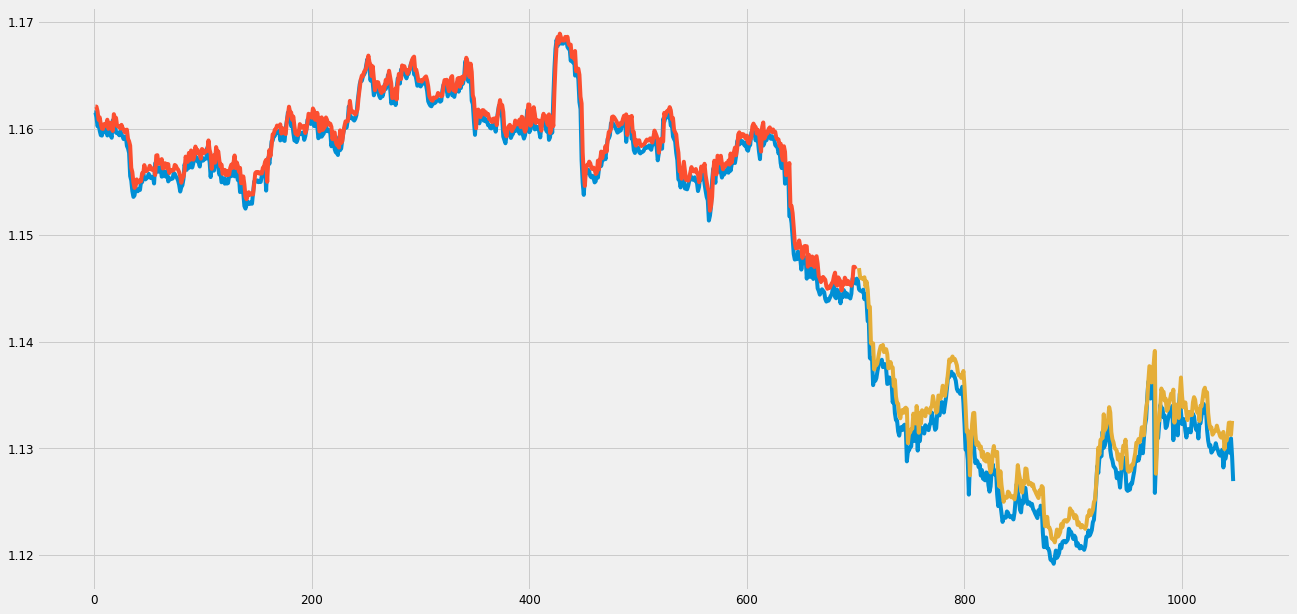

In [58]:
trainpredictplot=np.empty_like(dataset1)
trainpredictplot[:,:]=np.nan
trainpredictplot[1:len(trainpredict2)+1,:]=trainpredict2

testpredictplot=np.empty_like(dataset1)
testpredictplot[:,:]=np.nan
testpredictplot[len(trainpredict2)+(look_back*2)+1:len(dataset1)-1,:]=testpredict2

rcParams['figure.figsize']=20,10
plt.plot((dataset1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)

plt.show()